<a href="https://colab.research.google.com/github/AryanKumar1416/PRODIGY_DS_03/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file_path='/content/drive/MyDrive/bank'
df=pd.read_csv(file_path, delimiter=';')
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
print(df.head())
print(df.info())


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [ ]:
print(df['y'].value_counts())


y
no     3668
yes     451
Name: count, dtype: int64


In [ ]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8713592233009708
Confusion Matrix:
 [[675  57]
 [ 49  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       732
           1       0.43      0.47      0.45        92

    accuracy                           0.87       824
   macro avg       0.68      0.69      0.69       824
weighted avg       0.88      0.87      0.87       824



In [ ]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- duration <= 563.50
|   |--- nr.employed <= 5087.65
|   |   |--- duration <= 165.50
|   |   |   |--- pdays <= 3.50
|   |   |   |   |--- euribor3m <= 0.86
|   |   |   |   |   |--- age <= 47.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  47.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- euribor3m >  0.86
|   |   |   |   |   |--- duration <= 149.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  149.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- pdays >  3.50
|   |   |   |   |--- euribor3m <= 0.66
|   |   |   |   |   |--- marital <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- marital >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- euribor3m >  0.66
|   |   |   |   |   |--- default <= 0.50
|   |   |   |   |   |   |--- cons.price.idx <= 93.36
|   |   |   |   |   |   |   |--- day_of_week <= 2.50
|   |   |   |   |   |   |   |   |--- duration <= 114.50
|   |   |   |   |

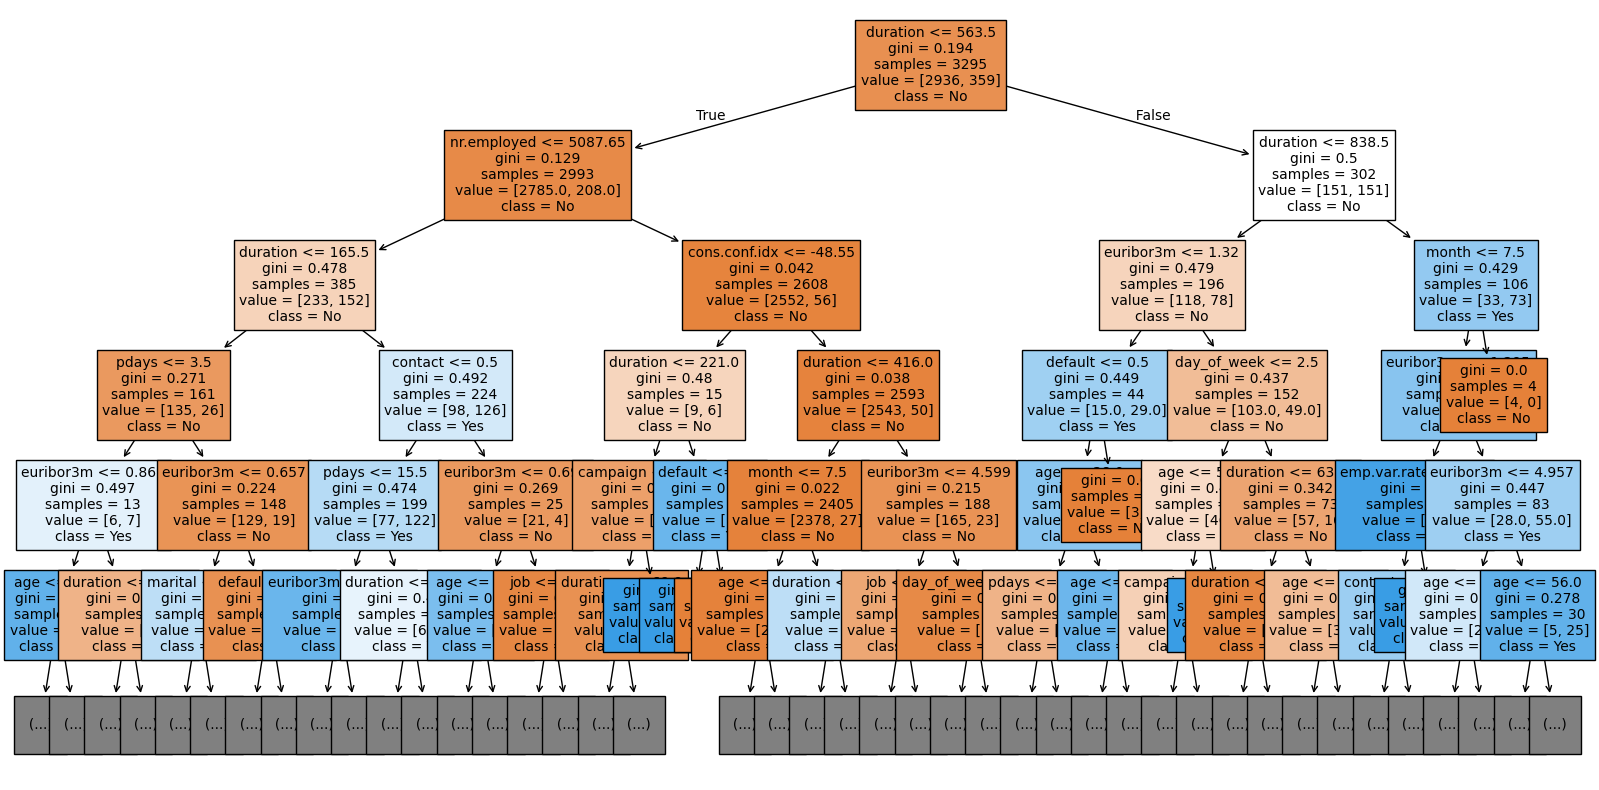

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the tree depth you requested
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['No', 'Yes'],
          filled=True,
          max_depth=5,
          fontsize=10)

plt.show()


In [ ]:
import pickle

# Save the trained model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Save the LabelEncoder (for categorical features)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [ ]:
from google.colab import files
import pandas as pd


uploaded = files.upload()


In [ ]:
# Load LabelEncoder
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

# Encode categorical columns in the uploaded data
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = le.fit(new_data[col]).transform(new_data[col])


In [ ]:
# Load the trained Decision Tree
with open('decision_tree_model.pkl', 'rb') as f:
    clf = pickle.load(f)

# Make predictions
predictions = clf.predict(new_data)
predictions_proba = clf.predict_proba(new_data)

# Map predictions to yes/no
pred_labels = ['Yes' if p==1 else 'No' for p in predictions]

# Add predictions to the dataframe
new_data['Prediction'] = pred_labels
new_data['Probability_No'] = predictions_proba[:,0]
new_data['Probability_Yes'] = predictions_proba[:,1]

print(new_data.head())


## Project Summary: Bank Marketing Data Classification

This notebook focuses on building a classification model to predict whether a customer will subscribe to a term deposit based on bank marketing data.

**Steps Performed:**

1.  **Data Loading and Initial Exploration:**
    *   Loaded the `bank.csv` dataset using pandas, addressing initial issues with the file path and delimiter (`;`).
    *   Examined the dataset structure, column types, and checked for missing values using `df.info()` and `df.head()`.
    *   Analyzed the distribution of the target variable 'y' (subscription to a term deposit) using `value_counts()`, revealing an imbalanced dataset with significantly more 'no' than 'yes' subscriptions.

2.  **Data Preprocessing:**
    *   Converted categorical features into numerical representations using `LabelEncoder` to prepare the data for the machine learning model.
    *   Separated the features (X) from the target variable (y).
    *   Split the dataset into training (80%) and testing (20%) sets to train and evaluate the model effectively.

3.  **Model Training:**
    *   Initialized and trained a Decision Tree Classifier model (`DecisionTreeClassifier`) on the training data (`X_train`, `y_train`).

4.  **Model Evaluation:**
    *   Made predictions on the unseen test data (`X_test`).
    *   Evaluated the model's performance using key metrics:
        *   **Accuracy:** Calculated the overall accuracy of the model.
        *   **Confusion Matrix:** Generated a confusion matrix to understand the breakdown of true positive, true negative, false positive, and false negative predictions.
        *   **Classification Report:** Produced a classification report providing precision, recall, and F1-score for each class ('yes' and 'no'), highlighting the model's performance on the imbalanced dataset.

5.  **Decision Tree Visualization (Partial):**
    *   Attempted to visualize the trained decision tree, although due to the tree's depth, the full structure was truncated in the output.

**Current Status:**

We have successfully built and evaluated a baseline Decision Tree Classifier model. The evaluation metrics, particularly the confusion matrix and classification report, indicate that while the model performs well on the majority class ('no'), there is room for improvement in predicting the minority class ('yes').

**Next Steps:**

Based on the evaluation, potential next steps could include:

*   Addressing the class imbalance through techniques like oversampling or undersampling.
*   Tuning the hyperparameters of the Decision Tree Classifier or trying other classification algorithms.
*   Exploring feature importance to understand which features are most influential in the predictions.
*   Visualizing the decision tree in a more interpretable way or focusing on key branches.